# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_key import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"



## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

628

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
weather_df = pd.DataFrame({
    "City Name":[],
    "Country":[],
    "Clouds":[],
    "Latitude":[],
    "Longitude":[],
    "Date":[],
    "Temperature":[],
    "Humidity":[],
    "Wind Speed":[]
})


recordCount = 1
print("Beginning Data Retrieval")
print("-------------------------")
#query_url = f"{url}appid={api_key}&q={cities[i]}&units={units}"
for i in range(len(cities)):
    query_url = f"{url}appid={api_key}&q={cities[i]}&units={units}"
    try:
        #query_url = f"{url}appid={api_key}&q={cities[i]}&units={units}"
        print(f"Processing Record {recordCount} of set 1 | {cities[i]}")
        response = requests.get(query_url + city).json()
        city_lat = response['coord']['lat']
        city_long = response['coord']['lon']
        city_temp = response['main']['temp_max']
        city_clouds = response['clouds']['all']
        city_country = response['sys']['country']
        city_humidity = response['main']['humidity']
        city_wind = response['wind']['speed']
        city_date = time.strftime('%Y-%m-%d', time.localtime(response["dt"]))
            
        weather_df = weather_df.append({
            "City Name":cities[i],
            "Country":city_country,
            "Clouds":city_clouds,
            "Latitude":city_lat,
            "Longitude":city_long,
            "Date":city_date,
            "Temperature":city_temp,
            "Humidity":city_humidity,
            "Wind Speed":city_wind
        }, ignore_index=True)
        recordCount += 1
    except:
        print("City not found. Skipping...")
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")


 


    

Beginning Data Retrieval
-------------------------
Processing Record 1 of set 1 | ushuaia
Processing Record 2 of set 1 | leh
Processing Record 3 of set 1 | attawapiskat
City not found. Skipping...
Processing Record 3 of set 1 | fairbanks
Processing Record 4 of set 1 | rolim de moura
City not found. Skipping...
Processing Record 4 of set 1 | leshukonskoye
Processing Record 5 of set 1 | jamestown
Processing Record 6 of set 1 | xining
Processing Record 7 of set 1 | bredasdorp
Processing Record 8 of set 1 | taolanaro
City not found. Skipping...
Processing Record 8 of set 1 | port alfred
Processing Record 9 of set 1 | vaini
Processing Record 10 of set 1 | bluff
Processing Record 11 of set 1 | rikitea
Processing Record 12 of set 1 | decatur
Processing Record 13 of set 1 | ribeira grande
Processing Record 14 of set 1 | barentsburg
City not found. Skipping...
Processing Record 14 of set 1 | butaritari
Processing Record 15 of set 1 | punta arenas
Processing Record 16 of set 1 | college
Processi

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weather_df.to_csv(output_data_file)

In [6]:
weather_df

,City Name,Country,Clouds,Latitude,Longitude,Date,Temperature,Humidity,Wind Speed
0,ushuaia,AR,75.0,-54.81,-68.31,2018-10-30,279.150,73.0,12.30
1,leh,IN,48.0,34.16,77.58,2018-10-30,250.105,72.0,0.70
2,fairbanks,US,1.0,64.84,-147.72,2018-10-30,264.250,83.0,1.40
3,leshukonskoye,RU,0.0,64.90,45.76,2018-10-30,268.605,92.0,2.90
4,jamestown,AU,0.0,-33.21,138.60,2018-10-30,301.030,36.0,5.30
5,xining,CN,0.0,36.62,101.77,2018-10-30,262.055,64.0,1.20
6,bredasdorp,ZA,92.0,-34.53,20.04,2018-10-30,283.150,66.0,3.10
7,port alfred,ZA,68.0,-33.59,26.89,2018-10-30,288.730,89.0,9.20
8,vaini,IN,0.0,15.34,74.49,2018-10-30,289.280,61.0,1.85
9,bluff,AU,92.0,-23.58,149.07,2018-10-30,294.455,99.0,7.05


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

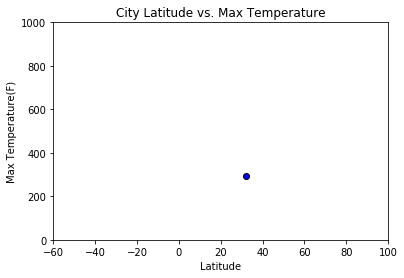

In [8]:
plt.scatter(city_lat, city_temp, facecolor = "blue", edgecolor = "black")
plt.xlim(-60, 100)
plt.ylim(0, 1000)
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(F)")

plt.show()

#### Latitude vs. Humidity Plot

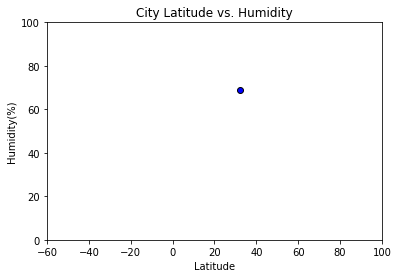

In [9]:
plt.scatter(city_lat, city_humidity, facecolor = "blue", edgecolor = "black")
plt.xlim(-60, 100)
plt.ylim(0, 100)
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")

plt.show()

#### Latitude vs. Cloudiness Plot

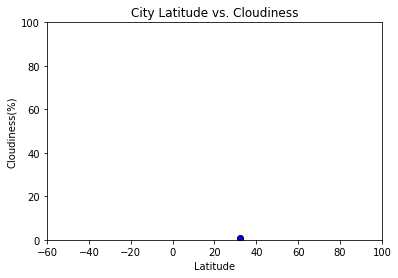

In [10]:
plt.scatter(city_lat, city_clouds, facecolor = "blue", edgecolor = "black")
plt.xlim(-60, 100)
plt.ylim(0, 100)
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")

plt.show()

#### Latitude vs. Wind Speed Plot

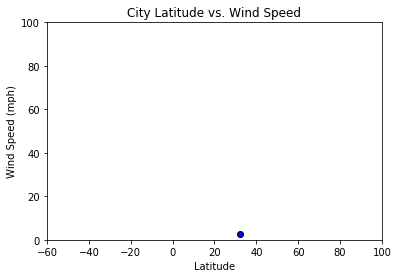

In [11]:
plt.scatter(city_lat, city_wind, facecolor = "blue", edgecolor = "black")
plt.xlim(-60, 100)
plt.ylim(0, 100)
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.show()